# Introduction

Objective



*   Membuat sebuah model prekstif untuk mendeteksi fraud








Instruction


* Data understanding : Analisis data kemudian jelaskan<br>
* Data preparation : jelaskan alasan melakukan suatu perubahan pada data<br>
* Modeling : jelaskan alasan memilih suatu algoritma untuk dijadikan model<br>
* Evaluasi : jelaskan evaluasi dari algoritma yang digunakan<br>
* Insight : jelaskan insight yang didapatkan<br>



In [65]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from plotly.subplots import make_subplots
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer

# Load and Describe Data

## Load Data

In [2]:
df = pd.read_csv('creditcard.csv')
print('Total Row', df.shape[0], ' ,Total Feature', df.shape[1],'\n')
df.head(5)

Total Row 284807  ,Total Feature 31 



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Terdapat 284.807 baris dan 31 kolom. Data  merupakan data asli sebuah perusahaan, maka feature di rubah menjadi V1-V28. 
Target data adalah kolom class, dimana 

*   Nilai 1 adalah Fraud
*   Nilai 0 adalah Bukan Fraud



## Data Desccription

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Berdasarkan data pada kolom  *Time* terdapat 284.807 transaksi yang terjadi selama 172.792 detik atau selama 2 hari.




# Data Preparation

## Handle Missing Value

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Handle Duplicated Data

In [6]:
df.duplicated().sum()

1081

Tidak ada missing value dan terdapat 1081 baris duplicate. Maka hapus data duplicate

In [7]:
df.drop_duplicates(inplace=True)
print ("Shape of data frame : ",df.shape)

Shape of data frame :  (283726, 31)


## Examine the class imbalance

In [8]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [9]:
group = df.groupby('Class')['Time'].count()
fig = go.Figure()
fig.add_trace(go.Bar(name='counts',x=group.index, y=group.values, marker_line_color='black', marker_line_width=2,
                     text=group.values,textposition='outside'))
fig.update_yaxes(title_text='Number of Cases')
fig.update_xaxes(title_text='Case',nticks=3)
fig.update_layout(template='seaborn',hovermode='closest',title='Number of Fraud vs Non-Fraud Cases',
                 width=700,height=400,xaxis=dict(mirror=True,linecolor='black',linewidth=2),
                 yaxis=dict(mirror=True,linecolor='black',linewidth=2),margin=dict(t=50,b=0,l=70,r=0))
fig.show()

In [10]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Dari histogram diatas dapat dilihat bahwa dataset yang digunakan sangat tidak seimbang

In [11]:
df.groupby('Class').agg(
    transactions=('Class', 'count'),
    total_revenue=('Amount', 'sum'),
).round(2)

,transactions,total_revenue
Class,,
0,283253,25043410.29
1,473,58591.39


Dari data kita dapat mengelompokan bahwa kerugian yang ditimbulkan Fraud yaitu $ 58,591.39 selama 2 hari.

## Feature Scaling

dari analisa dataset diatas kita dapat melihat bahwa fitur-fitur yang ada sudah diskalakan, terkecuali fitur Amout dan Time.

In [12]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
#Feature Scaling
rob_scaler = RobustScaler()
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [13]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

#scaled_amount and scaled_time are added to the starting of the dataframe
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Splitting the Data

Sebelum melanjutkan dengan teknik Random UnderSampling kita harus memisahkan dataframe orginal. Mengapa? untuk tujuan pengujian, ingatlah meskipun kami membagi data saat menerapkan teknik Random UnderSampling , kami ingin menguji model kami pada set pengujian asli bukan pada set pengujian yang dibuat oleh salah satu teknik ini. Tujuan utamanya adalah untuk menyesuaikan model baik dengan dataframe yang undersample (agar model kami dapat mendeteksi pola), dan mengujinya pada set pengujian asli.

## Random Under Sampling

In [14]:
#Random Under Sampling

X = df.drop('Class', axis=1)
y = df['Class']
rus = RandomUnderSampler(random_state=42)
X_rs, y_rs = rus.fit_resample(X,y)

In [15]:
#Random Under-sampled Dataframe
df_rs = pd.DataFrame(np.hstack((X_rs,y_rs[:, None])), columns=df.columns)
df_rs.Class = df_rs.Class.astype(int)
df_rs.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.270060,0.958308,0.032432,0.845050,0.161690,-0.798504,0.695579,-0.565116,0.933765,-0.062716,...,0.013430,-0.229609,-0.491374,0.001259,-0.400306,-0.451544,0.143434,0.246293,0.084199,0
1,-0.152413,-0.256242,1.205443,0.289451,0.741620,0.746450,-0.682445,-1.276868,0.136546,-0.284828,...,-0.043590,-0.208169,-0.589665,0.185183,0.933687,0.168355,0.058053,-0.025197,0.027646,0
2,-0.281185,-0.517144,-0.275684,1.112403,0.942716,-0.136235,0.427005,-0.504525,0.686810,-0.014106,...,0.130043,-0.321393,-0.851229,-0.121964,-0.509255,-0.052742,0.124297,0.244629,0.089349,0
3,1.881380,0.196931,1.802716,-0.304729,-2.092921,0.191727,0.553230,-1.079475,0.755031,-0.537489,...,0.061476,0.078572,0.251564,-0.165849,-0.392507,0.277481,0.121611,-0.135312,-0.068539,0
4,0.168544,-0.338811,-2.525869,2.202607,0.633063,0.584094,-0.668050,0.201383,0.207289,0.336436,...,0.166092,-0.191501,-0.238654,-0.115595,-0.024809,-0.158276,-0.669323,-1.506852,-0.739474,0


In [16]:
#Frauds vs. Non-Frauds for the new dataframe
group = df_rs.groupby('Class')['scaled_time'].count()
fig = go.Figure()
fig.add_trace(go.Bar(name='counts',x=group.index, y=group.values, marker_line_color='black', marker_line_width=2,
                     text=group.values,textposition='outside'))
fig.update_yaxes(title_text='Number of Cases')
fig.update_xaxes(title_text='Case',nticks=3)
fig.update_layout(template='seaborn',hovermode='closest',title='Number of Fraud vs Non-Fraud Cases',
                 width=700,height=400,xaxis=dict(mirror=True,linecolor='black',linewidth=2),
                 yaxis=dict(mirror=True,linecolor='black',linewidth=2),margin=dict(t=50,b=0,l=70,r=0))
fig.show()

In [17]:
print('Percentage of No Frauds: {}%'.format(round(df_rs.Class.value_counts()[0]/len(df_rs) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(df_rs.Class.value_counts()[1]/len(df_rs) * 100.0,2)))

Percentage of No Frauds: 50.0%
Percentage of Frauds: 50.0%


## Correlation heatmap

Heatmap 1


ini dibangun di atas himpunan data asli. Himpunan data asli adalah himpunan data yang tidak seimbang dengan rasio 99,83:0,17 dari Non-fraudulant adalah untuk transaksi Fraudulant masing-masing. Oleh karena itu, ini bukan indikator yang baik tentang fitur apa yang mempengaruhi transaksi untuk menjadi penipu. Hal yang sama dapat dilihat melalui heapmap serta sebagian besar fitur tidak menunjukkan korelasi sama sekali.


Heatmap 2 

Untuk mendapatkan pandangan yang lebih baik tentang fitur apa yang memengaruhi transaksi untuk menjadi penipu, akan lebih baik untuk memplot heatmap di atas himpunan data yang dirusak secara acak di mana distribusi kelas (penipuan vs non-penipuan) sama. Seperti dapat dilihat melalui gambar heatmap ini menunjukkan banyak korelasi antara berbagai fitur. Oleh karena itu, grafik ini terbukti berguna dalam mempelajari fitur-fiturnya.

In [18]:
fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=['Correlation Matrix for the original dataframe','Correlation Matrix for the undersampled dataframe'])

fig.add_trace(go.Heatmap(name='original df',z=df.corr().values,x=df.corr().index,y=df.corr().index,
                         coloraxis='coloraxis'),1,1)
fig.add_trace(go.Heatmap(name='undersampled df',z=df_rs.corr().values,x=df_rs.corr().index,y=df_rs.corr().index,
                         coloraxis='coloraxis'),2,1)
fig.update_layout(height=800,width=700,coloraxis = {'colorscale':'YlOrRd'})
fig.show() 



*   Heatmap 1
 ini dibangun di atas himpunan data asli. Himpunan data asli adalah himpunan data yang tidak seimbang dengan rasio 99,83:0,17 dari Non-fraudulant adalah untuk transaksi Fraudulant masing-masing. Oleh karena itu, ini bukan indikator yang baik tentang fitur apa yang mempengaruhi transaksi untuk menjadi penipu. Hal yang sama dapat dilihat melalui heapmap serta sebagian besar fitur tidak menunjukkan korelasi sama sekali.
*   Heatmap 2 
Untuk mendapatkan pandangan yang lebih baik tentang fitur apa yang memengaruhi transaksi untuk menjadi penipu, akan lebih baik untuk memplot heatmap di atas himpunan data yang dirusak secara acak di mana distribusi kelas (penipuan vs non-penipuan) sama. Seperti dapat dilihat melalui gambar heatmap ini menunjukkan banyak korelasi antara berbagai fitur. Oleh karena itu, grafik ini terbukti berguna dalam mempelajari fitur-fiturnya.



Tujuan utama saya adalah untuk menemukan fitur-fitur yang mempengaruhi transaksi menjadi penipu. Untuk mencapai ini, saya akan fokus pada kolom terakhir plot di mana korelasi antara berbagai fitur dan Kelas dihitung. Berikut ini adalah analisis saya


*   Korelasi Positif: Fitur V2, V4, V11 & V19 menunjukkan korelasi positif dengan kelas. Semakin tinggi nilai fitur-fitur ini, semakin tinggi kemungkinan transaksi menjadi penipu.
*   Korelasi Negatif: Fitur V10, V12, V14 & V17 menunjukkan korelasi negatif dengan kelas. Semakin rendah nilai fitur-fitur ini, semakin tinggi kemungkinan transaksi menjadi penipu



## Histogram

Di bawah ini saya telah memplot histogram fitur-fitur yang tercantum di atas. Baris pertama histogram menunjukkan distribusi fitur yang berkorelasi positif dengan Kelas: V2, V4, V11 & V19, sedangkan baris kedua menunjukkan distribusi fitur yang berkorelasi negatif dengan Kelas: V10, V12, V14 & V17.

In [19]:
rows = 2
cols = 4
fig = make_subplots(rows=rows,cols=cols,vertical_spacing=0.15,
                    subplot_titles=['V2 Distribution', 'V4 Distribution', 'V11 Distribution', 'V19 Distribution',
                                                 'V10 Distribution', 'V12 Distribution', 'V14 Distribution', 'V17 Distribution'])
features = ['V2','V4','V11','V19','V10','V12','V14','V17']
for r in range(1,rows+1):
    for c in range(1, cols+1):
        fig.add_trace(go.Histogram(name=features[r+c-2],x=df.loc[df.Class==1,features[r+c-2]]),r,c)
        fig.update_xaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
        fig.update_yaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
fig.update_layout(template='seaborn',title='Distribusi Fitur untuk Fraud')
fig.show()

## Box Plot

Boxplot adalah cara standar untuk menampilkan distribusi data berdasarkan ringkasan lima angka ("minimum", kuartil pertama (Q1), median, kuartil ketiga (Q3), dan "maksimum"). Ini dapat memberi tahu Anda tentang outlier Anda dan apa nilai-nilai mereka. Ini juga dapat memberi tahu Anda apakah data Anda simetris, seberapa ketat data Anda dikelompokkan, dan apakah dan bagaimana data Anda miring.

Anda perlu memiliki informasi tentang variabilitas atau penyebaran data. Boxplot adalah grafik yang memberi Anda indikasi yang baik tentang bagaimana nilai-nilai dalam data tersebar. Meskipun lot kotak mungkin tampak primitif dibandingkan dengan histogram atau plot kepadatan, mereka memiliki keuntungan mengambil lebih sedikit ruang, yang berguna ketika membandingkan distribusi antara banyak kelompok atau himpunan data.

Di bawah ini saya telah memplot boxplot untuk semua fitur yang menunjukkan korelasi positif dan negatif dengan Class. Representasi boxplot untuk setiap fitur ditampilkan secara terpisah untuk masing-masing kelas(0 &1).

In [20]:
#Box-Plots for Positive Correlation
rows=1
cols=4
features = ['V2','V4','V11','V19']
fig = make_subplots(rows=rows,cols=cols,subplot_titles=['V2 vs Class','V4 vs Class','V11 vs Class','V19 vs Class'])
for r in range(1,rows+1):
    for c in range(1,cols+1):
        fig.add_trace(go.Box(name=features[r+c-2],x=df_rs['Class'],y=df_rs[features[r+c-2]]),r,c)
        fig.update_xaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
        fig.update_yaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
fig.update_layout(width=700,template='seaborn',title='Boxplots for Positive Correlations')

In [21]:
#Box-Plots for Negative Correlation
rows=1
cols=4
features = ['V10','V12','V14','V17']
fig = make_subplots(rows=rows,cols=cols,subplot_titles=['V10 vs Class','V12 vs Class','V14 vs Class','V17 vs Class'])
for r in range(1,rows+1):
    for c in range(1,cols+1):
        fig.add_trace(go.Box(name=features[r+c-2],x=df_rs['Class'],y=df_rs[features[r+c-2]]),r,c)
        fig.update_xaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
        fig.update_yaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
fig.update_layout(width=700,template='seaborn',title='Boxplots for Negative Correlations')

## Outlier Removal

In [22]:
#Outlier Removal
def outlier_removal(df,feature, fraud):
    array = df[feature].loc[df['Class'] == fraud].values 
    q25, q75 = np.percentile(array, 25), np.percentile(array,75)
    print('25th percentile: {} | 75th percentile: {}'.format(q25,q75))
    iqr = q75 - q25
    print('Interquartile Range: {}'.format(iqr))
    cutoff = iqr*1.5
    lower_threshold, upper_threshold = q25 - cutoff, q75 + cutoff
    print('Cutoff: {}'.format(cutoff))
    print('Lower Threshold: {} | Upper Threshold: {}'.format(lower_threshold, upper_threshold))
    outliers = [a for a in array if a < lower_threshold or a > upper_threshold]
    print('{} Outliers: {}'.format(feature,outliers))
    print('Number of outliers detected for feature {}: {}'.format(feature,len(outliers)))
    df = df.drop(df[(df[feature] > upper_threshold) | (df[feature] < lower_threshold)].index)
    print('Number of records after outlier removal: {}'.format(len(df)))
    print('-'*117)
    return df

Saya akan mencoba menghapus outlier untuk fitur V10 dan V2 karena melalui boxplot di atas kita dapat melihat bahwa ini memiliki jumlah outlier maksimum. Kode akan menunjukkan outlier yang terdeteksi dan jumlah totalnya dan akhirnya menghapus semua outlier.

In [23]:
#Removal of outliers for features V10 and V2. Since, these two features seem to have the most number of outliers.
df_rs_out = outlier_removal(df_rs,'V10', 1)
df_rs_out = outlier_removal(df_rs_out,'V2',1)

25th percentile: -7.29780335001461 | 75th percentile: -2.44746925511151
Interquartile Range: 4.850334094903101
Cutoff: 7.275501142354651
Lower Threshold: -14.57330449236926 | Upper Threshold: 4.8280318872431405
V10 Outliers: [-14.6764702497464, -15.1241628144947, -16.6496281595399, -18.2711681738888, -15.2399619587112, -14.9246547735487, -15.5637913387301, -16.7460441053944, -15.3460988468775, -15.1237521803455, -22.1870885620007, -17.1415136412892, -16.3035376590131, -16.2556117491401, -16.6011969664137, -15.2318333653018, -18.9132433348732, -20.9491915543611, -19.836148851696, -23.2282548357516, -24.4031849699728, -24.5882624372475]
Number of outliers detected for feature V10: 22
Number of records after outlier removal: 917
---------------------------------------------------------------------------------------------------------------------
25th percentile: 1.12825627326543 | 75th percentile: 4.143964921917915
Interquartile Range: 3.0157086486524847
Cutoff: 4.523562972978727
Lower Thr

Di bawah ini kita dapat melihat boxplot yang mewakili keadaan sebelum dan sesudah outlier untuk fitur V10 dan V2. Jelas jelas bahwa jumlah outlier telah berkurang setelah melalui penghapusan outlier.

In [24]:
rows=2
cols=2
features=['V2','V10']
fig = make_subplots(rows=rows,cols=cols,
                    shared_yaxes=True,subplot_titles=[features[0]+' vs Class <br> (Before Outlier Removal)',
                                                        features[0]+' vs Class <br> (After Outlier Removal)',
                                                        features[1]+' vs Class <br> (Before Outlier Removal)',
                                                        features[1]+' vs Class <br> (After Outlier Removal)'])
for r in range(1,rows+1):
    fig.add_trace(go.Box(name=features[r-1]+'(Before)',x=df_rs['Class'],y=df_rs[features[r-1]]),r,1)
    fig.add_trace(go.Box(name=features[r-1]+'(After)',x=df_rs_out['Class'],y=df_rs_out[features[r-1]]),r,2)
    fig.update_xaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=1)
    fig.update_yaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=1)
    fig.update_xaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=2)
    fig.update_yaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=2)
fig.update_layout(width=700,template='seaborn',title='Comparison of Box Plots after outlier removal - V10 & V2')
fig.show()

# Classifier (Undersampling)

In [26]:
# Undersampling before cross validation(prove to overfit)
X = df_rs.drop('Class', axis=1)
y = df_rs['Class']
print("Shape of X is {} and that of y is {}".format(X.shape, y.shape))

Shape of X is (946, 30) and that of y is (946,)


Saya akan membagi data menggunakan pemisahan uji kereta api sebesar 0,8:0,2 yang berarti set pelatihan memiliki 80% dari catatan dan sisanya 20% dalam set pengujian.

In [27]:
#Split the data using train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('Shape of training set ', X_train.shape)
print('Shape of test set ', X_test.shape)

Shape of training set  (756, 30)
Shape of test set  (190, 30)


Di bawah ini saya telah menambahkan pengklasifikasi ke kamus untuk membuat pengkodean lebih mudah. Jika ada perubahan yang diperlukan pada pengklasifikasi maka ini adalah satu-satunya tempat yang perlu diubah.


# Modeling and Evaluation

In [28]:
def rmse(targets,predictions):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val  

In [34]:
regressors = [LinearRegression(),
              DummyClassifier(strategy='most_frequent', random_state=0),
              LogisticRegression(solver = 'lbfgs', max_iter=1000),
              LGBMClassifier(),
              XGBClassifier(),
              KNeighborsClassifier(3),
              DecisionTreeClassifier(),
              RandomForestClassifier(),
              AdaBoostClassifier(),
              GradientBoostingClassifier(),
              GaussianNB()
              ]

df = pd.DataFrame(columns = ['Method', 'MAE', 'RMSE', 'R2 Score'])
df

,Method,MAE,RMSE,R2 Score


In [35]:
regressors

[LinearRegression(),
 DummyClassifier(random_state=0, strategy='most_frequent'),
 LogisticRegression(max_iter=1000),
 LGBMClassifier(),
 XGBClassifier(),
 KNeighborsClassifier(n_neighbors=3),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 GaussianNB()]

In [36]:
for regressor in regressors:
    print(regressor)

LinearRegression()
DummyClassifier(random_state=0, strategy='most_frequent')
LogisticRegression(max_iter=1000)
LGBMClassifier()
XGBClassifier()
KNeighborsClassifier(n_neighbors=3)
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
GaussianNB()


In [41]:
for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    method = str(type(regressor)).split('.')[-1][:-2]
    
    # MAE score
    mae = mean_absolute_error(y_test, y_pred)
    
    #RMSE Score
    rmse_value = rmse(y_test, y_pred)
    
    #R2 Score
    r2 = r2_score(y_test, y_pred)
    
    df = df.append({'Method': method, 
                    'MAE': mae, 
                    'RMSE': rmse_value,
                    'R2 Score': r2},
                     ignore_index=True)


In [42]:
df

,Method,MAE,RMSE,R2 Score
0,LinearRegression,0.251781,0.328051,0.569483
1,DummyClassifier,0.505263,0.710819,-1.021277
2,LogisticRegression,0.057895,0.240613,0.768395
3,LGBMClassifier,0.073684,0.271448,0.705230
4,XGBClassifier,0.078947,0.280976,0.684176
5,KNeighborsClassifier,0.052632,0.229416,0.789450
6,DecisionTreeClassifier,0.100000,0.316228,0.599956
7,RandomForestClassifier,0.063158,0.251312,0.747340
8,AdaBoostClassifier,0.073684,0.271448,0.705230
9,GradientBoostingClassifier,0.084211,0.290191,0.663121


dari tabel diatas kita dapat lihat bahwa model Kneighbours , Logistic regresion dan Random Forest regression memiliki nilai MAE dan RMSE yang cukup kecil (itu menandapakn baik)

In [56]:
regressors = [DummyClassifier(strategy='most_frequent', random_state=0),
              LogisticRegression(solver = 'lbfgs', max_iter=1000),
              LGBMClassifier(),
              XGBClassifier(),
              KNeighborsClassifier(3),
              DecisionTreeClassifier(),
              RandomForestClassifier(),
              AdaBoostClassifier(),
              GradientBoostingClassifier(),
              GaussianNB()
              ]

df_result = pd.DataFrame(columns=['Model', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect',
                                  'accuracy', 'precision', 'recall', 'f1', 'roc_auc','avg_pre'])
df_result

,Model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_pre


In [57]:
regressors

[DummyClassifier(random_state=0, strategy='most_frequent'),
 LogisticRegression(max_iter=1000),
 LGBMClassifier(),
 XGBClassifier(),
 KNeighborsClassifier(n_neighbors=3),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 GaussianNB()]

In [58]:
for regressor in regressors:
    print(regressor)

DummyClassifier(random_state=0, strategy='most_frequent')
LogisticRegression(max_iter=1000)
LGBMClassifier()
XGBClassifier()
KNeighborsClassifier(n_neighbors=3)
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
GaussianNB()


In [62]:
for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    method = str(type(regressor)).split('.')[-1][:-2]
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)
    
    row = {'model': method,
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': round(accuracy,3),
        'precision': round(precision,3),
        'recall': round(recall,3),
        'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_pre': round(avg_precision,3),
    }

    df_result = df_result.append(row, ignore_index=True)


In [63]:
df_result

,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_pre
0,GaussianNB,76,92,4,18,168,22,0.884,0.950,0.809,0.874,0.883,0.863
1,DummyClassifier,94,0,96,0,94,96,0.495,0.495,1.000,0.662,0.500,0.495
2,LogisticRegression,85,94,2,9,179,11,0.942,0.977,0.904,0.939,0.942,0.931
3,LGBMClassifier,83,93,3,11,176,14,0.926,0.965,0.883,0.922,0.926,0.910
4,XGBClassifier,82,93,3,12,175,15,0.921,0.965,0.872,0.916,0.921,0.905
5,KNeighborsClassifier,86,94,2,8,180,10,0.947,0.977,0.915,0.945,0.947,0.936
6,DecisionTreeClassifier,82,87,9,12,169,21,0.889,0.901,0.872,0.886,0.889,0.849
7,RandomForestClassifier,81,94,2,13,175,15,0.921,0.976,0.862,0.915,0.920,0.909
8,AdaBoostClassifier,84,92,4,10,176,14,0.926,0.955,0.894,0.923,0.926,0.906
9,GradientBoostingClassifier,82,92,4,12,174,16,0.916,0.953,0.872,0.911,0.915,0.895


dari model performance model diatas kita pilih 3 model terbaik  dengan nilai presisi yang tinggi yaitu : logistic regression, kneighbours classifier dan random forest classifier

# Tuning Hyperparameter

## Hyper Parameter Tunning Logistic Regression

In [68]:
# Undersampling before cross validation
X = df_rs.drop('Class', axis=1)
y = df_rs['Class']

#Split the data using train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [69]:
#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)
#Membuat Object Logistic Regression
logreg = LogisticRegression()
#Memasukan ke Grid Search
#CV itu Cross Validation
#Menggunakan 10-Fold CV
clf = GridSearchCV(logreg, hyperparameters, cv=10)
#Fitting Model
best_model = clf.fit(X,y)
#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
#Prediksi menggunakan model baru
y_pred = best_model.predict(X_test)
#Check performa dari model
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

Best Penalty: l2
Best C: 29.763514416313132
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        96
           1       1.00      0.91      0.96        94

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9574468085106382

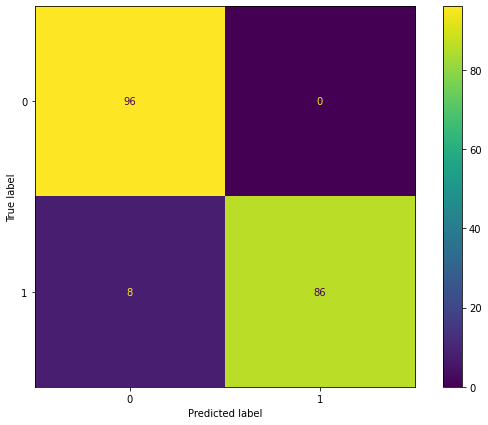

In [71]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=best_model.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=best_model.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

setelah di tuning model logistic regresion mengalami peningkatan, diantaranya
1. Precision dari 97.7% menjadi 99.9%
2. F1 score dari 93.3% menjadi 96%



## Hyperparamater Tuning KNN

In [72]:
# Undersampling before cross validation
X = df_rs.drop('Class', axis=1)
y = df_rs['Class']

#Split the data using train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

knn_clf = KNeighborsClassifier()

In [73]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='precision')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='precision')

In [75]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.982160,6
1,{'n_neighbors': 3},0.974201,7
2,{'n_neighbors': 4},0.988190,2
3,{'n_neighbors': 5},0.988321,1
4,{'n_neighbors': 6},0.988190,2
5,{'n_neighbors': 7},0.985462,5
6,{'n_neighbors': 8},0.988146,4


In [78]:
# what if we also want to tune "weights" hyperparameter
# "uniform": all K neighbors have the same influence
# "distance": closer neighbor in those K neighbors has stronger influence
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='precision')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='precision')

In [79]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.988321,1
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.988321,1
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.988278,3
4,"{'n_neighbors': 4, 'weights': 'uniform'}",0.988190,4
8,"{'n_neighbors': 6, 'weights': 'uniform'}",0.988190,4
12,"{'n_neighbors': 8, 'weights': 'uniform'}",0.988146,6
10,"{'n_neighbors': 7, 'weights': 'uniform'}",0.985462,7
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.985462,7
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.985337,9
0,"{'n_neighbors': 2, 'weights': 'uniform'}",0.982160,10


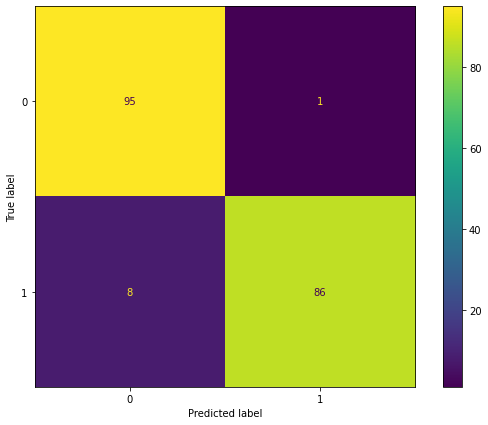

In [80]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [81]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        96
           1       0.99      0.91      0.95        94

    accuracy                           0.95       190
   macro avg       0.96      0.95      0.95       190
weighted avg       0.96      0.95      0.95       190



dari hasil tuing KNN classifier dapat dilihat, diantaranya 
1. Precision meningkat dari 97,7% menjadi 99%
2. F1 score meningkat dari 94.5% menjadi 95%


## Hyperparameter tuning Random Forrest

In [82]:
# Undersampling before cross validation
X = df_rs.drop('Class', axis=1)
y = df_rs['Class']

#Split the data using train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [83]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [86]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='precision', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 3.54 s, sys: 10.8 ms, total: 3.55 s
Wall time: 3.55 s


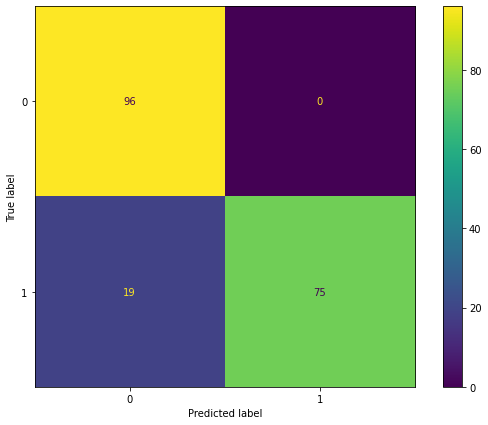

In [87]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [88]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        96
           1       1.00      0.80      0.89        94

    accuracy                           0.90       190
   macro avg       0.92      0.90      0.90       190
weighted avg       0.92      0.90      0.90       190



dari hasil tuning random forest didapat bahwa,
1. Precision meningkat dari 97,6% menjadi 99%
2. F1-score menurun dari 91,5% menjadi 89%

# Feature Importance

In [96]:
from sklearn.ensemble import RandomForestRegressor

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

rf = RandomForestRegressor()

grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='precision')
grid_search_forest.fit(X_train, y_train)


Output streaming akan dipotong hingga 5000 baris terakhir.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1765, in precision_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1348,

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='precision')

In [97]:
grid_search_forest.best_estimator_


RandomForestRegressor(max_depth=10, max_features=5, n_estimators=10)

In [98]:
rf = RandomForestRegressor(n_estimators=10,max_features=5)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


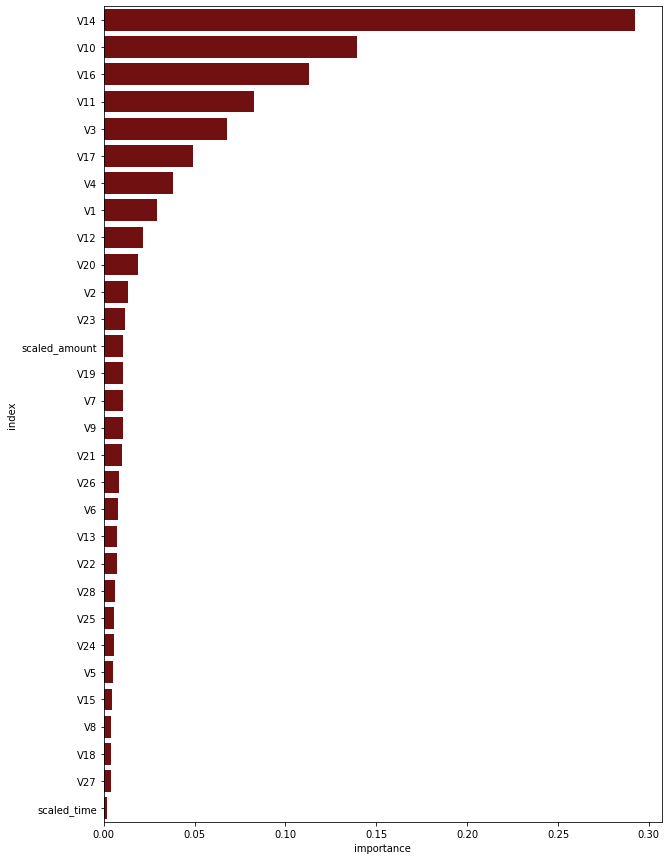

In [99]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

fig, ax = plt.subplots(1,1, figsize=(10,15))
sns.barplot(x='importance', y='index', color='#800000',data=feature_importances.reset_index())

# Insight



1. Transaksi fraud terjadi selama 2 hari
2. Transaksi fraud terjadi 473 kali dengan total 58.591,39 dollar 
3. Feature V2, V4, V11 & V19 memiliki korelasi possitif dengan Fraud
Feature V10, V12, V14, V17 memiliki korelasi negatif dengan Fraud
4. Top 5 feature Importance V14, V10, V16, V11, V3 paling berpengaruh terhadap fraud
5. Model terbaik kita logistic regression (undersampling) memiliki presicion 99,9%. 
dengan benar dapat memprediksi 96 dari 104  fraud di dalam kumpulan data 284,795. dan tidak salah menandai fraud ketika orang-orang tidak curang.
6. Berdasarkan  rata-rata  nilai transaksi fraud $ 123,87  sekali transaksi.
Model kita dapat menghemat dana bank $5.945,76 per hari , dan $2.170.202,4 per tahun. 